# Preprocessing 🫡

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses


In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))


2.10.0
[]


## Dataset

https://www.tensorflow.org/tutorials/load_data/images

In [3]:
data_dir = pathlib.Path("downloads\CatsDogs")


### Looking at the folders

In [4]:
image_count = len(list(data_dir.glob("*/*.jpg")))
print(image_count)


23401


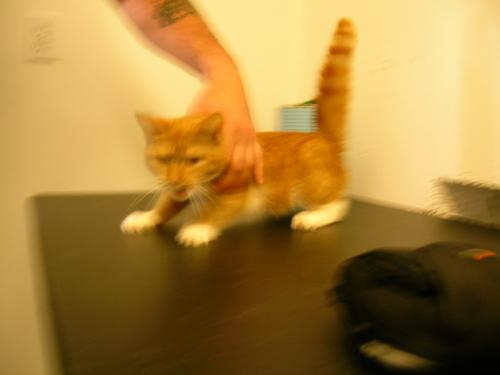

In [5]:
cats = list(data_dir.glob("Cats/*"))
PIL.Image.open(str(cats[0]))


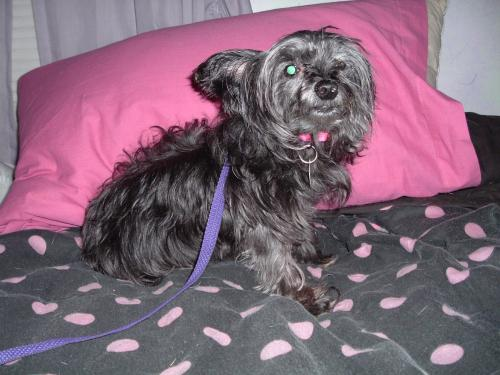

In [6]:
dogs = list(data_dir.glob("Dogs/*"))
PIL.Image.open(str(dogs[0]))


### Building the Dataset

In [7]:
batch_size = 42
img_height = 100
img_width = 100
color_mode='grayscale'

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode="grayscale",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 23401 files belonging to 2 classes.
Using 18721 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    color_mode="grayscale",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)


Found 23401 files belonging to 2 classes.
Using 4680 files for validation.


### Dataset visualization

In [10]:
class_names = train_ds.class_names
print(class_names)


['Cats', 'Dogs']


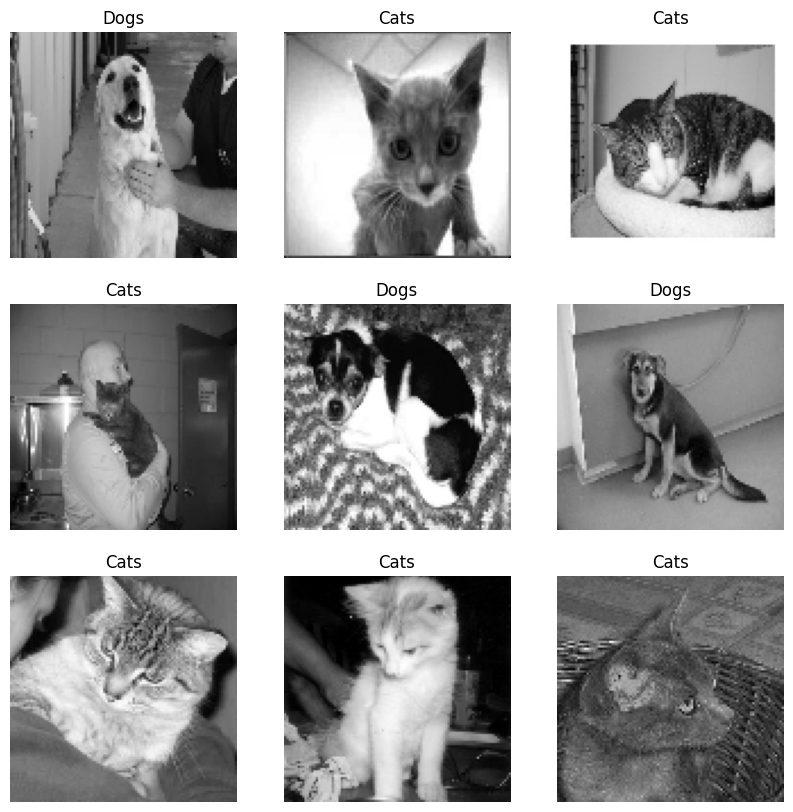

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(42, 100, 100, 1)
(42,)


### Dataset standardization

In [13]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)


In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(image_batch[0]), np.max(image_batch[0]))
print(image_batch[0].shape)


0.026631199 0.91382354
(100, 100, 1)
